
# Przygotowanie

Przygotowanie
Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko. {nr_albumu}_{imię}_{nazwisko}_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji.

# Support Vector Machine

Jest to jeden z najbardziej rozpowszechnionych i wszechstronnych modeli uczenia maszynowego. Z jego uzyciem dokonac mozna klasyfikacji liniowej (SVC), nieliniowej jak i regresji (SVR). Na poniższej grafice przedstawione zostało działanie klasyfikatora.

![svc](https://github.com/Batomet/SVC/blob/master/svc.png?raw=1)

Analizujac grafike dostrzec mozna dwie oddzielne klasy oddzielone za pomoca prostej. Widoczna linia ciagła rozdziela klasy, a przerywane linie oznaczają margines, czyli możliwe najdalsze oddalenie elementu (np. nowego) jaki zakwalifikowany
zostanie do danej klasy. Maszyny SVM czułe sa na skale danych, przed ich uzyciem zawsze powinna zostać przeprowadzona normalizacja danych (np. min-max, lub standaryzacja).

![svc_example](https://github.com/Batomet/SVC/blob/master/svc2.jpg?raw=1)

Równowage pomiedzy marginesami możemy regulować za pomoca hipermarapetru
C. Mniejsze jego wartości poszerzają granice, jednocześnie wprowadzając
więcej jej naruszeń. Im margines jest szerszy, tym własciwosci generalizujace
jakie posiada klasyfikator będę większe. Mniejsza staje się podatność na przeuczenie
(ang. overfitting), ale zmniejsza się skuteczność klasyfikatora. Szukany jest
taki klasyfikator, który podzieli przestrzeń na dwa rozłaczne zbiory odpowiadajace
dwóm klasom, w możliwie optymalny sposób. Podejście opiera się na
znalezieniu granicy decyzyjnej.

Wektory nośne (Support vectors) są to obserwacje (data points), które wystepują najbliżej hiperpłaszczyzny. Punkty te, pomagają lepiej wyznaczyć linię separacji pomiędzy klasami poprzez obliczenie marginesów. Są to najbardziej znaczace obserwacje ze zbioru z punktu widzenia konstrukcji klasyfikatora.

Warto zaznaczyć, że za pomocą klasyfikatora SVC można klasyfikaować dane, które nie są linowo separowalne. Można to osiągnąć przez tzw "sztuczkę kernelową", dzięki czemu możliwe jest zmapowanie obserwacji do wielowymiarowej przestrzeni. Klasyfikator z biblioteki Sklearn posiada parametr *kernel*, który pozwala na zmianę jądra. Dodatkowo, parametr *gamma* pozwala na modyfikację działania samego kernela.

Warto zaznaczyć, że SVC dobrze nadaje się do niewielkich zbiorów danych, gdyż w przypadku dużej ilości staję się on mało wydajny.

Funkcja jaka jest minimalizowana podczas działania klasyfikatora wygląda następująco:

\begin{equation}
min C \sum^m_{i=1}[y^{(i)}cost_{1}(\theta^{T}x^{(i)}) - (1 - y^{(i)})cost_{0}(\theta^{T}x^{(i)})] + \frac{1}{2} \sum^{n}_{i=1}\theta^{2}_{j}
\end{equation}

## Zadanie 0

Wczytanie danych ze zbioru oraz wizualizacja.

In [203]:
import pandas as pd

data_input = pd.read_csv('./Ankieta.csv')
data_input.head()

,Waga,Wzrost,Plec
0,55,160,Kobieta
1,78,180,Mezczyzna
2,55,150,Kobieta
3,99,196,Mezczyzna
4,90,180,Mezczyzna


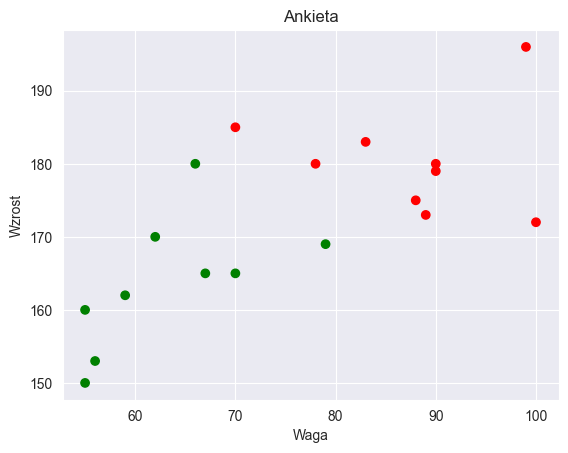

In [204]:
import matplotlib.pyplot as plt
from matplotlib import colors

x = data_input['Plec'].map(lambda x: 1 if x == 'Kobieta' else 0)
y = data_input['Waga']
z = data_input['Wzrost']

data_input['Plec'] = data_input['Plec'].map(lambda x: 1 if x == 'Kobieta' else 0)

plt.scatter(y, z, c=x, cmap=colors.ListedColormap(['red', 'green']))
plt.xlabel('Waga')
plt.ylabel('Wzrost')
plt.title('Ankieta')
plt.show()

C:\Users\barte\AppData\Local\Temp\ipykernel_19908\2004933028.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data_input.hist(ax=ax)


array([[<Axes: title={'center': 'Waga'}>,
        <Axes: title={'center': 'Wzrost'}>],
       [<Axes: title={'center': 'Plec'}>, <Axes: >]], dtype=object)

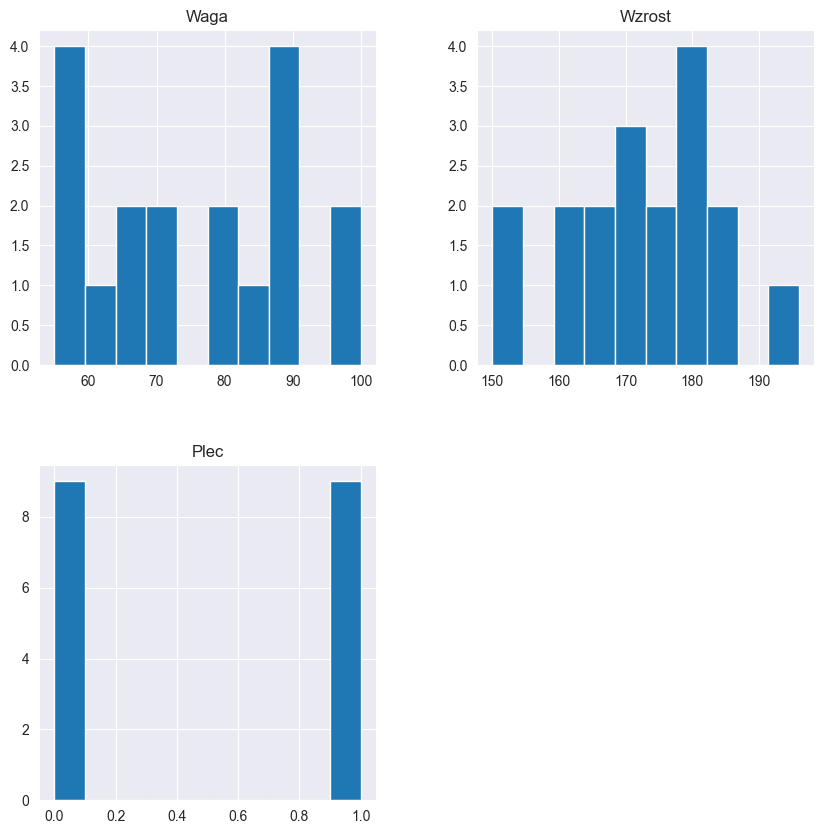

In [205]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data_input.hist(ax=ax)

<Axes: >

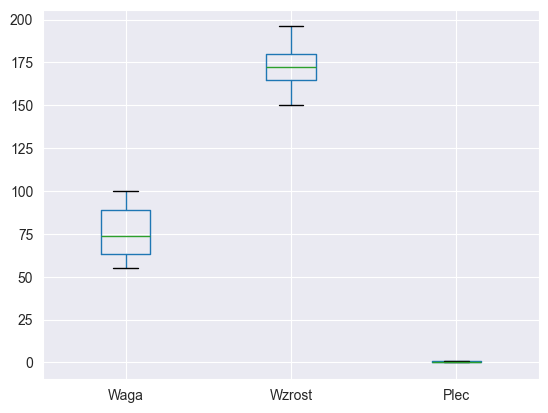

In [206]:
data_input.boxplot()

Na bazie wykresów box-plot można stwierdzić, że dane posiadają różniące się zakresy, co powoduje potrzebę ich skalowania. Warto zauważyć również, że rozkład klas w zbiorze jest równomierny (patrz: histogram)

## Zadanie 1

Proszę dokonać normalizacji zbioru danych za pomocą standaryzacji oraz narysować wykres box-plot dla wszystkich zmiennych. W jaki sposób zmieniły się dane? Co można powiedzieć o ich zakresach. W jakim celu dokonujemy normalizacji?

<Axes: >

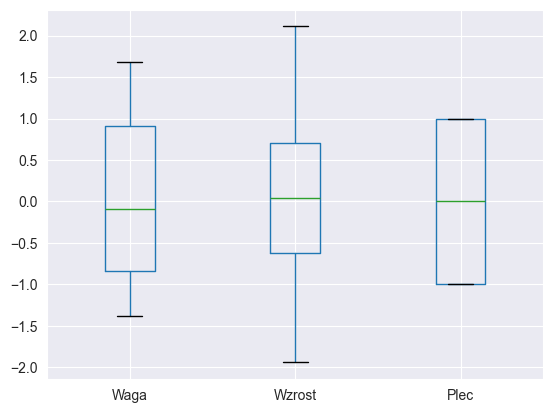

In [207]:
from sklearn.preprocessing import StandardScaler
%matplotlib inline

scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_input)

normalized_data_df = pd.DataFrame(normalized_data, columns=data_input.columns)

x = data_input['Plec']
y_normalized = normalized_data_df['Waga']
z_normalized = normalized_data_df['Wzrost']

normalized_data_df.boxplot()

Dane zostały znormalizowane do zakresu od -2 do 2. Normalizacja danych jest konieczna, ponieważ klasyfikator SVC jest wrażliwy na skalę danych. W przypadku, gdy dane nie są znormalizowane, klasyfikator może działać niepoprawnie. Normalizacja danych pozwala na uniknięcie tego problemu.

## Zadanie 2

W tym zadaniu należy dokonać podziału zbioru danych na uczący oraz testowy. Zbiór uczący będzie służył do treningu klasyfikatora, a testowy do obliczenia ostatecznej skuteczności klasyfikacji. Prosze, by 80% próbek znalazło się w zbiorze uczącym, a 20% w testowym. Proszę zadbać o odpowiednią inicjalizacje generatora pseudolosowego

In [208]:
from sklearn.model_selection import train_test_split

X = normalized_data_df[['Waga', 'Wzrost']]
y = normalized_data_df['Plec']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Zadanie 3

W tym zadaniu należy dokonać klasyfikacji danych za pomocą klasyfikatora SVC. Proszę obliczyć skuteczność klasyfikatora na danych po, oraz przed standaryzacją i porównać wyniki.

In [209]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)



0.75

In [210]:
X_not_normalized = data_input[['Waga', 'Wzrost']]
y_not_normalized = data_input['Plec']

X_train_not_normalized, X_test_not_normalized, y_train_not_normalized, y_test_not_normalized = train_test_split(X_not_normalized, y_not_normalized, test_size=0.2, random_state=42)

svc_not_normalized = SVC(kernel='linear')
svc_not_normalized.fit(X_train_not_normalized, y_train_not_normalized)
svc_not_normalized.score(X_test_not_normalized, y_test_not_normalized)

0.5

## Zadanie 4

Proszę dobrać odpowiedni parametr C (proszę spróbować z zakresu -1, 1 z krokiem co 0.1). Dla każdego C proszę wyrysować hiperpłaszczyznę utworzoną przez klasyfikator (w formie animimacji, lub inaczej). Proszę przedstawić na wykresie jak zmieniała się skuteczność klasyfikatora w zależności od parametru C. Jakie wnioski można wyciągnąć? Jak wpływa parametr C na wynik?

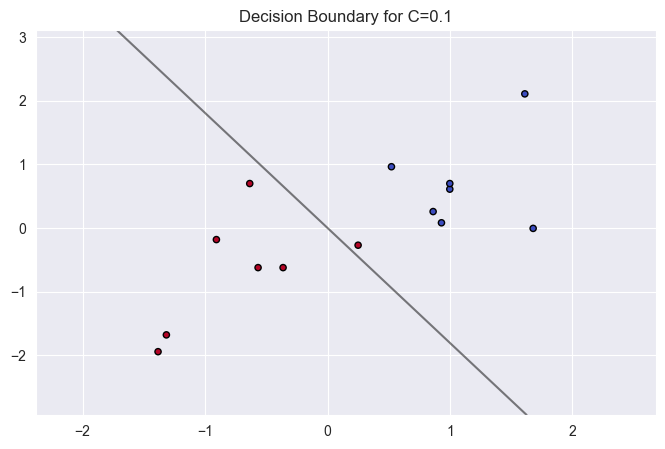

In [211]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from sklearn.svm import SVC

xlim = (X_train['Waga'].min() - 1, X_train['Waga'].max() + 1)
ylim = (X_train['Wzrost'].min() - 1, X_train['Wzrost'].max() + 1)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))

C_values = np.arange(0.1, 1.1, 0.1)
accuracies = np.zeros_like(C_values)

fig, ax = plt.subplots(figsize=(8, 5))
scat = ax.scatter(X_train['Waga'], X_train['Wzrost'], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
contour = None

def update(i):
    global contour
    if contour:
        contour.remove()
    C = C_values[i]
    svc = SVC(C=C, kernel='linear')
    svc.fit(X_train.values, y_train)

    Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    contour = ax.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

    ax.set_title(f'Decision Boundary for C={C:.1f}')
    return scat, contour

ani = FuncAnimation(fig, update, frames=len(C_values), repeat=True)

HTML(ani.to_jshtml())



Zmiana parametru C w naszym wypadku zmienia krzywą, ale w tym wypadku nie wpływa na dokładność.

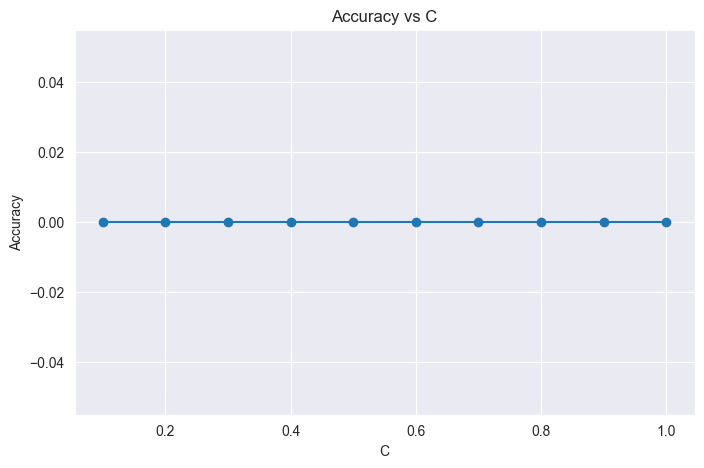

In [212]:
plt.figure(figsize=(8, 5))
plt.plot(C_values, accuracies, marker='o')
plt.title('Accuracy vs C')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Proszę dokonać pomiaru czasu wykonania algorytmu dla min. 2 różnych kerneli

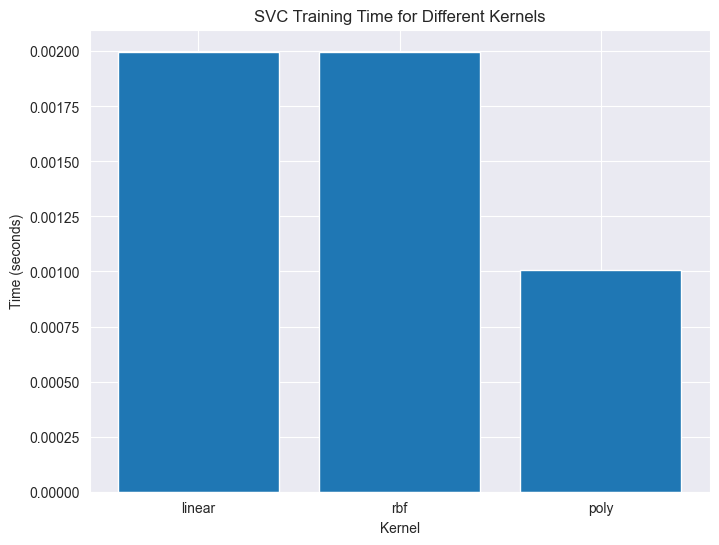

In [213]:
import time

kernels = ['linear', 'rbf', 'poly']
times = []

for kernel in kernels:
  start_time = time.time()
  svc = SVC(kernel=kernel)
  svc.fit(X_train, y_train)
  end_time = time.time()
  times.append(end_time - start_time)

plt.figure(figsize=(8, 6))
plt.bar(kernels, times)
plt.xlabel("Kernel")
plt.ylabel("Time (seconds)")
plt.title("SVC Training Time for Different Kernels")
plt.show()

### Dla zbioru *dataR2* proszę dokonać podobnej analizy danych. Opis zbioru: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

## Zadanie 6

Proszę zwizualizować dane dla 2 dowolnych zmiennych ze zbioru

C:\Users\barte\AppData\Local\Temp\ipykernel_19908\2742053229.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


<Axes: >

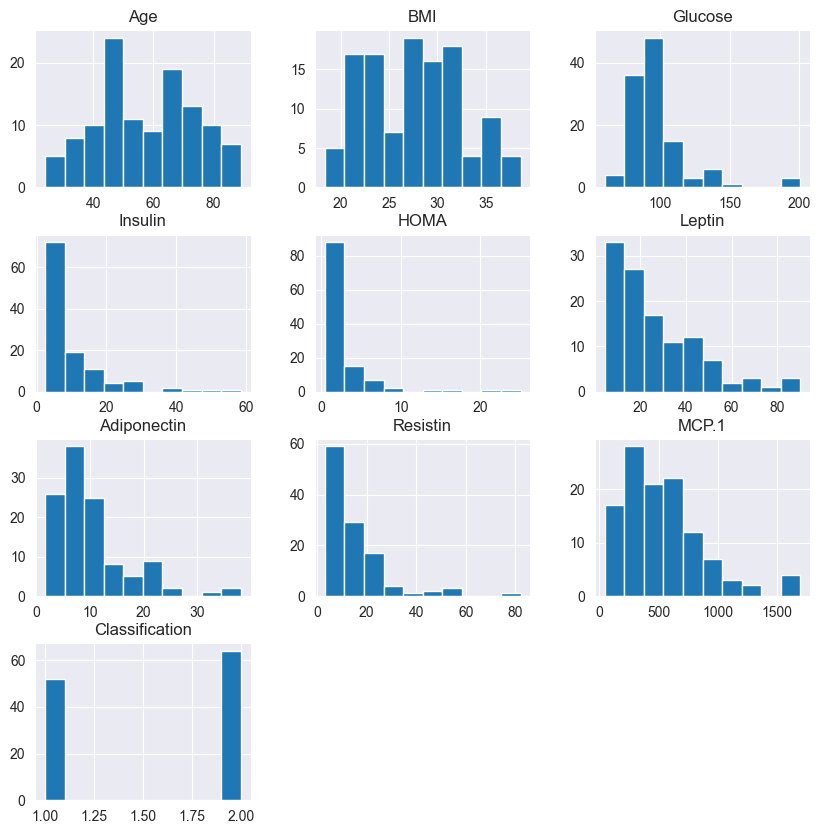

In [214]:
df = pd.read_csv('./dataR2.csv')
df['Classification'] = df['Classification'].astype(int)
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.hist(ax=ax)

df.boxplot()

## Zadanie 7

Proszę dokonać standaryzacji danych

In [215]:
scaler = StandardScaler()
df[['Leptin', 'MCP.1']] = scaler.fit_transform(df[['Leptin', 'MCP.1']])

X = df[['Leptin', 'MCP.1']]
y = df['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(df['Classification'])

## Zadanie 8

Trenowanie klasyfikatora. Proszę dokonać treningu klasyfikatora na zbiorze treningowym (X_train, y_train). Proszę użyć różnych wartości parametru C, gamma oraz kernel. Pełna dokumentacja klasyfikatora: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html Wyniki proszę podsumować na odpowiednim wykresie lub tabeli. Test skuteczności klasyfikatora proszę dokonać na zbiorze testowym (X_test, y_test).

       C  gamma  kernel  accuracy  \
0    0.1   0.01  linear  0.500000   
1    0.1   0.01     rbf  0.500000   
2    0.1   0.01    poly  0.500000   
3    0.1   0.10  linear  0.500000   
4    0.1   0.10     rbf  0.500000   
5    0.1   0.10    poly  0.500000   
6    0.1   1.00  linear  0.500000   
7    0.1   1.00     rbf  0.500000   
8    0.1   1.00    poly  0.458333   
9    1.0   0.01  linear  0.500000   
10   1.0   0.01     rbf  0.500000   
11   1.0   0.01    poly  0.500000   
12   1.0   0.10  linear  0.500000   
13   1.0   0.10     rbf  0.500000   
14   1.0   0.10    poly  0.500000   
15   1.0   1.00  linear  0.500000   
16   1.0   1.00     rbf  0.458333   
17   1.0   1.00    poly  0.458333   
18  10.0   0.01  linear  0.500000   
19  10.0   0.01     rbf  0.500000   
20  10.0   0.01    poly  0.500000   
21  10.0   0.10  linear  0.500000   
22  10.0   0.10     rbf  0.458333   
23  10.0   0.10    poly  0.500000   
24  10.0   1.00  linear  0.500000   
25  10.0   1.00     rbf  0.541667   
2

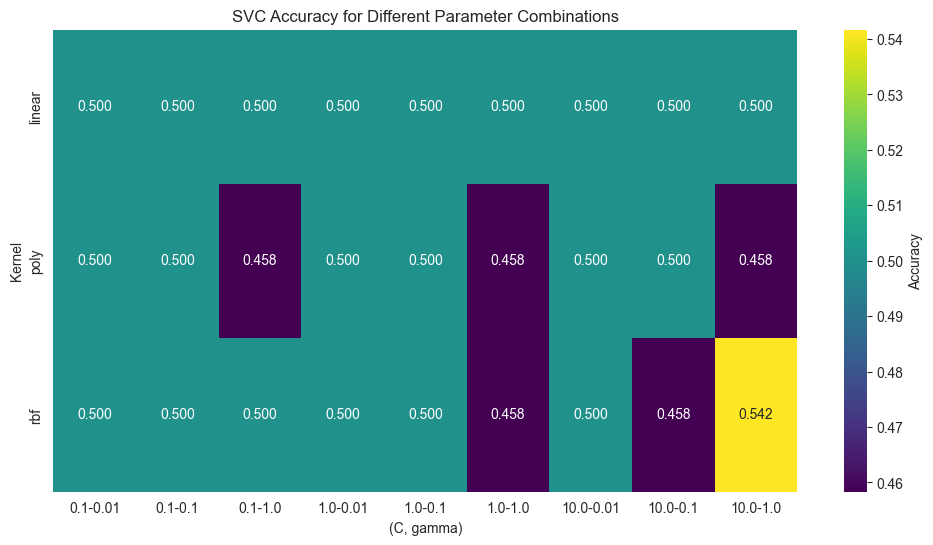

In [216]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid
import seaborn as sns


param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

results = []

for params in ParameterGrid(param_grid):
    svc = SVC(**params)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    results.append({
        'C': params['C'],
        'gamma': params['gamma'],
        'kernel': params['kernel'],
        'accuracy': accuracy,
        'y_pred': y_pred
    })

results_df = pd.DataFrame(results)

print(results_df)

best_result = max(results, key=lambda x: x['accuracy'])
best_params = best_result['C'], best_result['gamma'], best_result['kernel']
best_y_pred = best_result['y_pred']

pivot_table = results_df.pivot_table(values='accuracy', index='kernel', columns=['C', 'gamma'])
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap='viridis', cbar_kws={'label': 'Accuracy'})
plt.title('SVC Accuracy for Different Parameter Combinations')
plt.xlabel('(C, gamma)')
plt.ylabel('Kernel')
plt.show()


## Zadanie 9

Należy wyznaczyć macierze pomyłek dla klasyfikatora. Proszę dokonać wizualizacji wraz z kolorami na wykresie. Przykłady:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

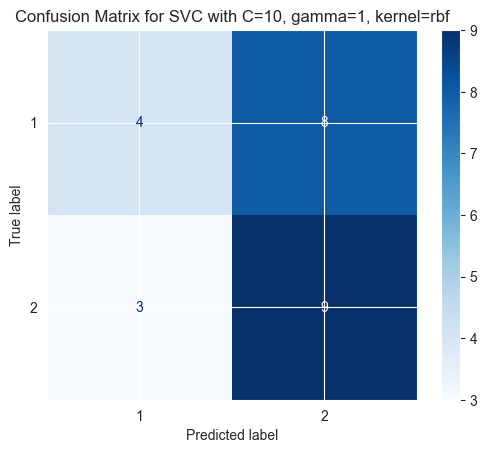

In [220]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, best_y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2])
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for SVC with C={best_params[0]}, gamma={best_params[1]}, kernel={best_params[2]}')
plt.show()